<a id="top"></a>

# California Housing (Regression)

# Outline

- [Read Data](#read_data)
- [Create target and features](#create_y_and_X)
- [Split data into train and test](#train_test_split)
- [View descriptive statistics](#descriptive_statistics)
- [View target and feature distributions](#distributions)
- [View correlations](#correlations)
- [View relationships between target and features](#pair_plots)
- [Standardize predictors](#standardize_predictors)
- [Predictive models](#predictive_models)
- [Linear regression](#linear_regression)
- [K-nearest neighbors](#k_nearest_neighbors)
- [Elasticnet](#elasticnet)
- [Support vector machines](#support_vector_machines)
- [Random Forest](#random_forest)
- [Compare models](#compare_models)

# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from time import time
from pprint import pprint
from IPython.display import Image

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.inspection import permutation_importance

import warnings
warnings.filterwarnings('ignore')

<a id="read_data"></a>

# [Read data](https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset)

In [2]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

['{}: {}'.format(i, name) for (i, name) in enumerate(list(california_housing.feature_names))]

['0: MedInc',
 '1: HouseAge',
 '2: AveRooms',
 '3: AveBedrms',
 '4: Population',
 '5: AveOccup',
 '6: Latitude',
 '7: Longitude']

The target variable is: the median house value (in $100k) in a California census block group.

The features are:
  - MedInc: median income in block group
  - HouseAge: median house age in block group
  - AveRooms: average number of rooms
  - AveBedrms: average number of bedrooms
  - Population: block group population
  - AveOccup: average house occupancy
  - Latitude: house block group latitude
  - Longitude: house block group longitude

This dataset was derived from the 1990 U.S. census, using one row per census block group.  A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

<a id="create_y_and_X"></a>

# Create target, y, and predictor, X, variables

In [3]:
X = california_housing.data[:,0:6] # exclude latitude and longitude
y = california_housing.target
print('y shape: {}  X shape: {}'.format(y.shape, X.shape))

y shape: (20640,)  X shape: (20640, 6)


<a id="train_test_split"></a>

# Split data into train and test sets

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

In [5]:
print('''y_train shape: {}  X_train shape: {}
 y_test shape: {}    X_test shape:  {}'''.format(y_train.shape, X_train.shape, 
                                             y_test.shape,  X_test.shape))

y_train shape: (14448,)  X_train shape: (14448, 6)
 y_test shape: (6192,)    X_test shape:  (6192, 6)


<a id="descriptive_statistics"></a>

# View descriptive statistics

In [6]:
data = pd.DataFrame(np.hstack((y_train.reshape(-1,1), X_train)), 
                    columns=['target']+list(california_housing.feature_names)[:6])

data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
target,14448.0,2.08,1.16,0.15,1.20,1.80,2.66,5.00
MedInc,14448.0,3.87,1.89,0.50,2.57,3.54,4.74,15.00
HouseAge,14448.0,28.57,12.58,1.00,18.00,29.00,37.00,52.00
AveRooms,14448.0,5.43,2.57,0.85,4.44,5.23,6.06,141.91
AveBedrms,14448.0,1.10,0.50,0.33,1.01,1.05,1.10,34.07
Population,14448.0,1428.89,1130.65,3.00,788.00,1164.00,1723.00,35682.00
AveOccup,14448.0,3.12,12.39,0.75,2.43,2.82,3.27,1243.33


In [14]:
data.loc[data.AveOccup > 1243, :]

,target,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
3979,1.375,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333


In [24]:
data.loc[(data.AveOccup > 3.2) & (data.AveOccup < 1243), :].sort_values(by='AveOccup', ascending=False)

,target,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
8994,0.675,5.5179,36.0,5.142857,1.142857,4198.0,599.714286
10273,3.500,4.2639,46.0,9.076923,1.307692,6532.0,502.461538
3528,2.250,6.1359,52.0,8.275862,1.517241,6675.0,230.172414
3505,1.546,4.2391,5.0,5.123810,0.933333,8733.0,83.171429
401,1.625,1.6250,8.0,7.600000,0.950000,1275.0,63.750000
...,...,...,...,...,...,...,...
7623,1.298,3.4817,15.0,5.628083,1.058824,1687.0,3.201139
5973,1.606,4.8304,32.0,4.929648,0.972362,1274.0,3.201005
1992,3.202,6.1868,13.0,8.332326,1.126888,2119.0,3.200906
3975,1.926,3.4583,36.0,6.410480,1.100437,733.0,3.200873


<a id="distributions"></a>

# View target distribution

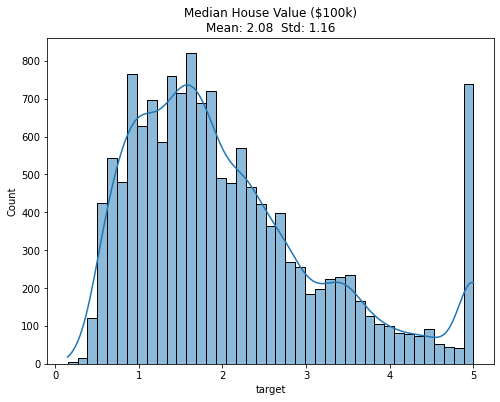

In [7]:
_, ax = plt.subplots(figsize=(8,6))
sns.histplot(data.target, kde=True, ax=ax)
ax.set_title('Median House Value ($100k)\nMean: {}  Std: {}'.format(round(data.target.mean(),2), 
                                                                    round(data.target.std(), 2)));

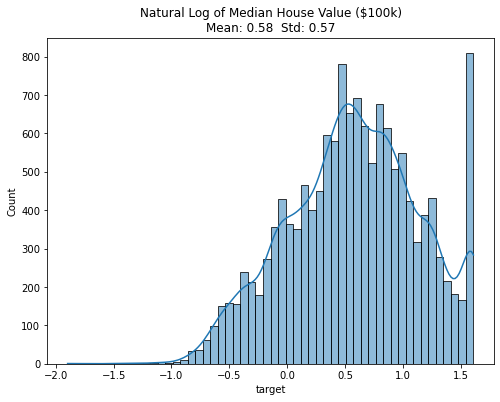

In [8]:
_, ax = plt.subplots(figsize=(8,6))
sns.histplot(np.log(data.target), kde=True, ax=ax)
ax.set_title('Natural Log of Median House Value ($100k)\nMean: {}  Std: {}'.format(round(np.log(data.target).mean(),2), 
                                                                                   round(np.log(data.target).std(), 2)));

# View predictor distributions

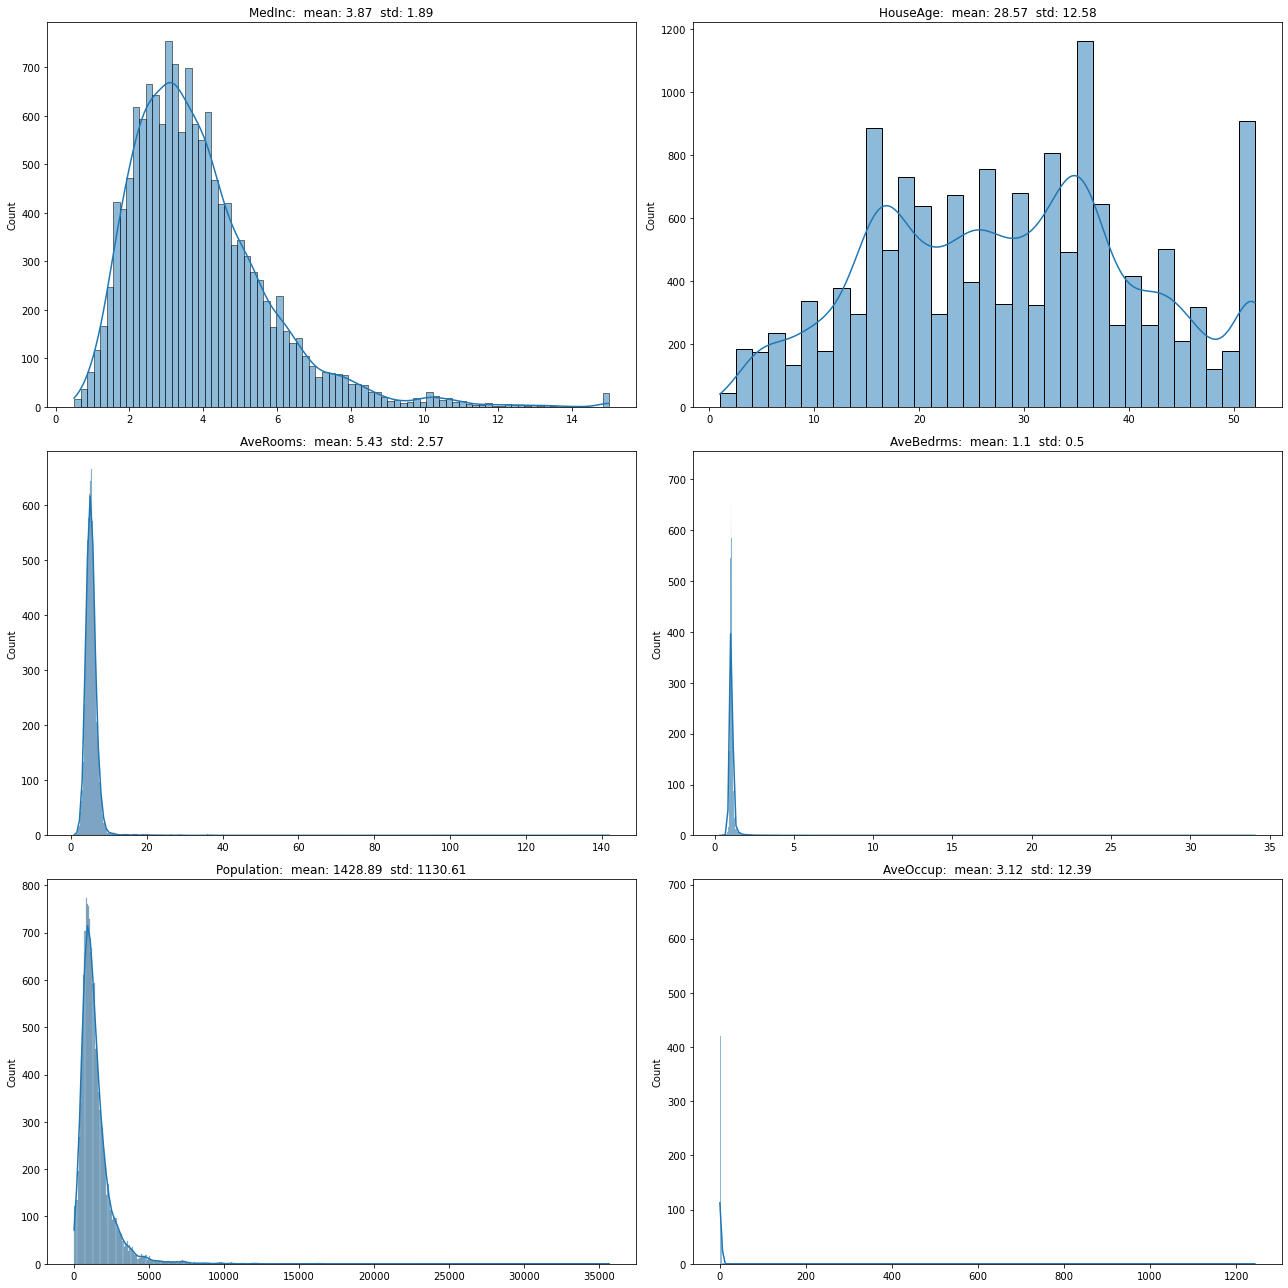

In [9]:
f, axs = plt.subplots(3, 2, figsize=(18,18))

for i, feat in enumerate(X_train.T):
    sns.histplot(feat, kde=True, ax=axs.flat[i])
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(california_housing.feature_names)[i], feat.mean().round(2), feat.std().round(2)))
plt.tight_layout();

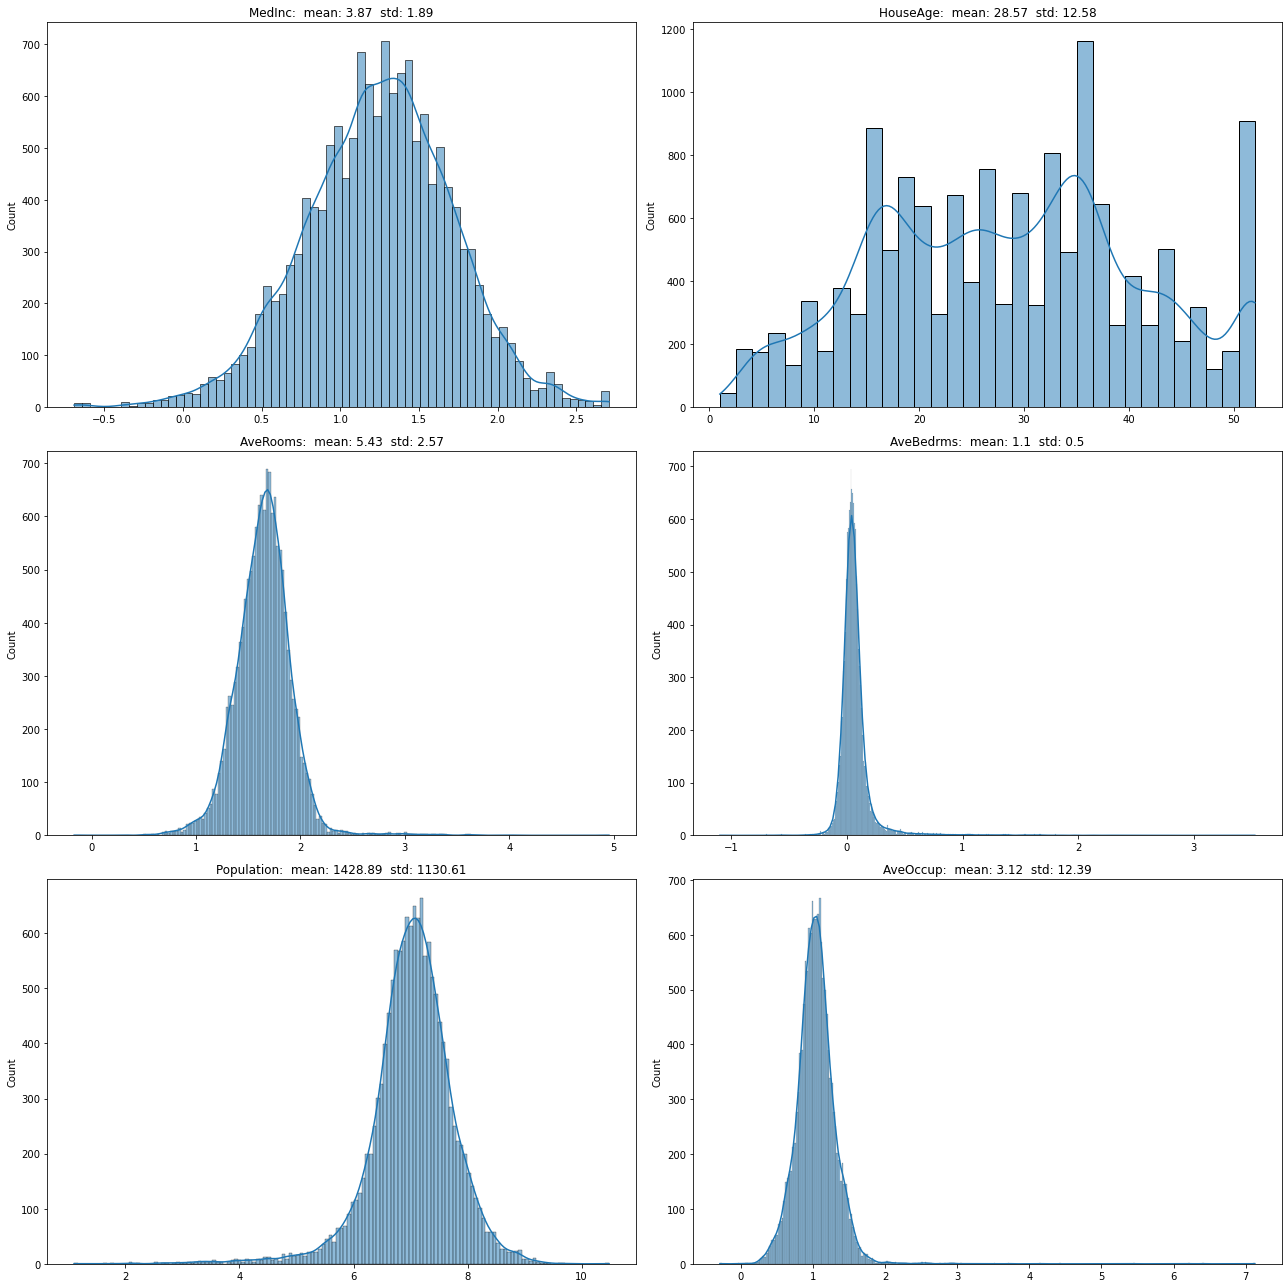

In [10]:
f, axs = plt.subplots(3, 2, figsize=(18,18))

for i, feat in enumerate(X_train.T):
    if i != 1:
        sns.histplot(np.log(feat), kde=True, ax=axs.flat[i])
        axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(california_housing.feature_names)[i], feat.mean().round(2), feat.std().round(2)))
    else:
        sns.histplot(feat, kde=True, ax=axs.flat[i])
        axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(california_housing.feature_names)[i], feat.mean().round(2), feat.std().round(2)))
plt.tight_layout();

In [11]:
data = data.applymap(lambda x: np.log(x))

<a id="correlations"></a>

# View predictor [correlations](https://en.wikipedia.org/wiki/Correlation_and_dependence)

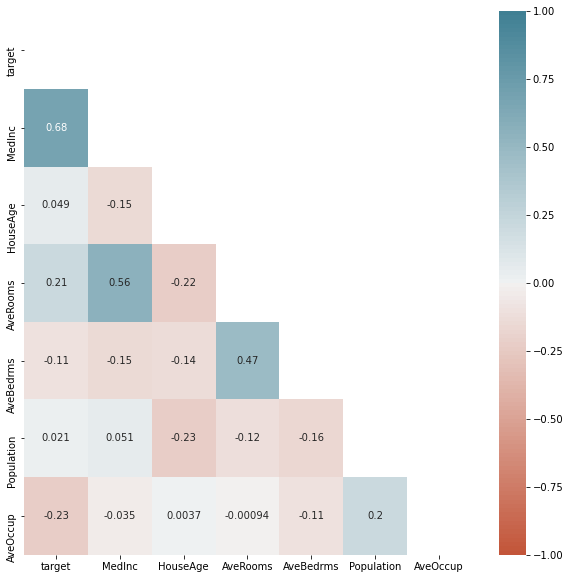

In [12]:
plt.figure(figsize=(10, 10))

# np.triu: https://numpy.org/doc/stable/reference/generated/numpy.triu.html
# sns.heatmap: https://seaborn.pydata.org/generated/seaborn.heatmap.html
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), 
            annot=True, fmt='.2g', 
            mask=matrix, 
            vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=128));

<a id="pair_plots"></a>

# Visualize distributions of, and relationships between, target and predictors

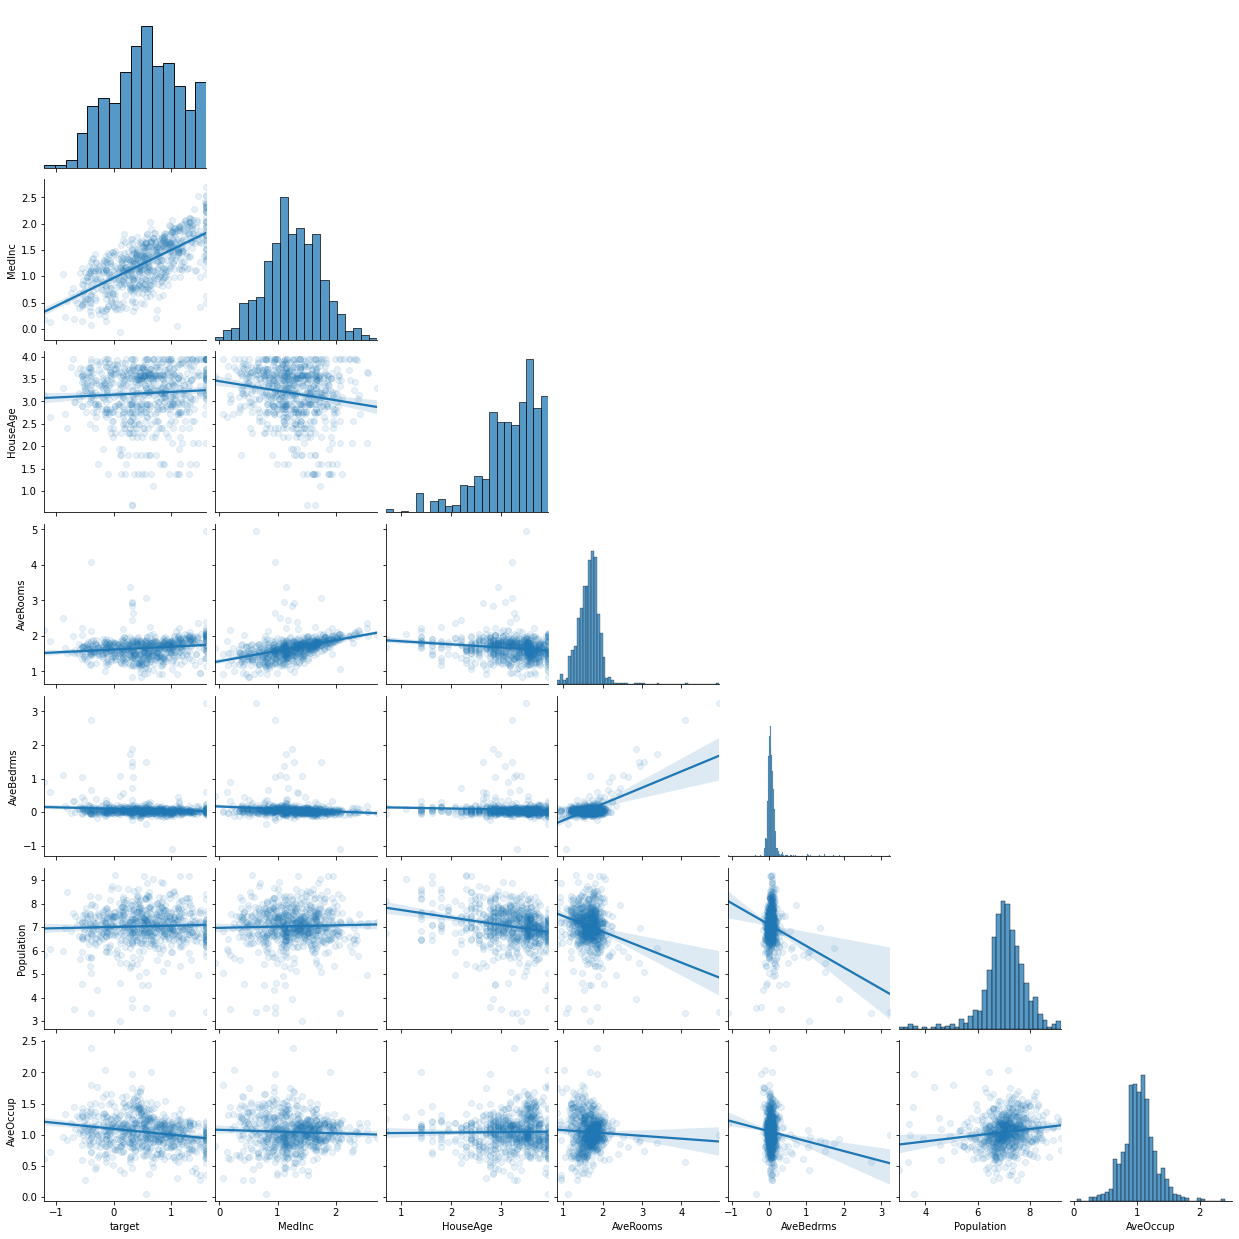

In [13]:
# sns.pairplot: https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(data.sample(frac=0.05, random_state=1234),#.iloc[:,:-2], 
             vars=list(data.columns),#[:-2], 
             kind='reg',
             corner=True,  
             plot_kws={'scatter_kws': {'alpha': 0.1}});

<a id="standardize_predictors"></a>

# [Standardize](https://scikit-learn.org/stable/modules/preprocessing.html) the Predictors

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

# View standardized predictor distributions

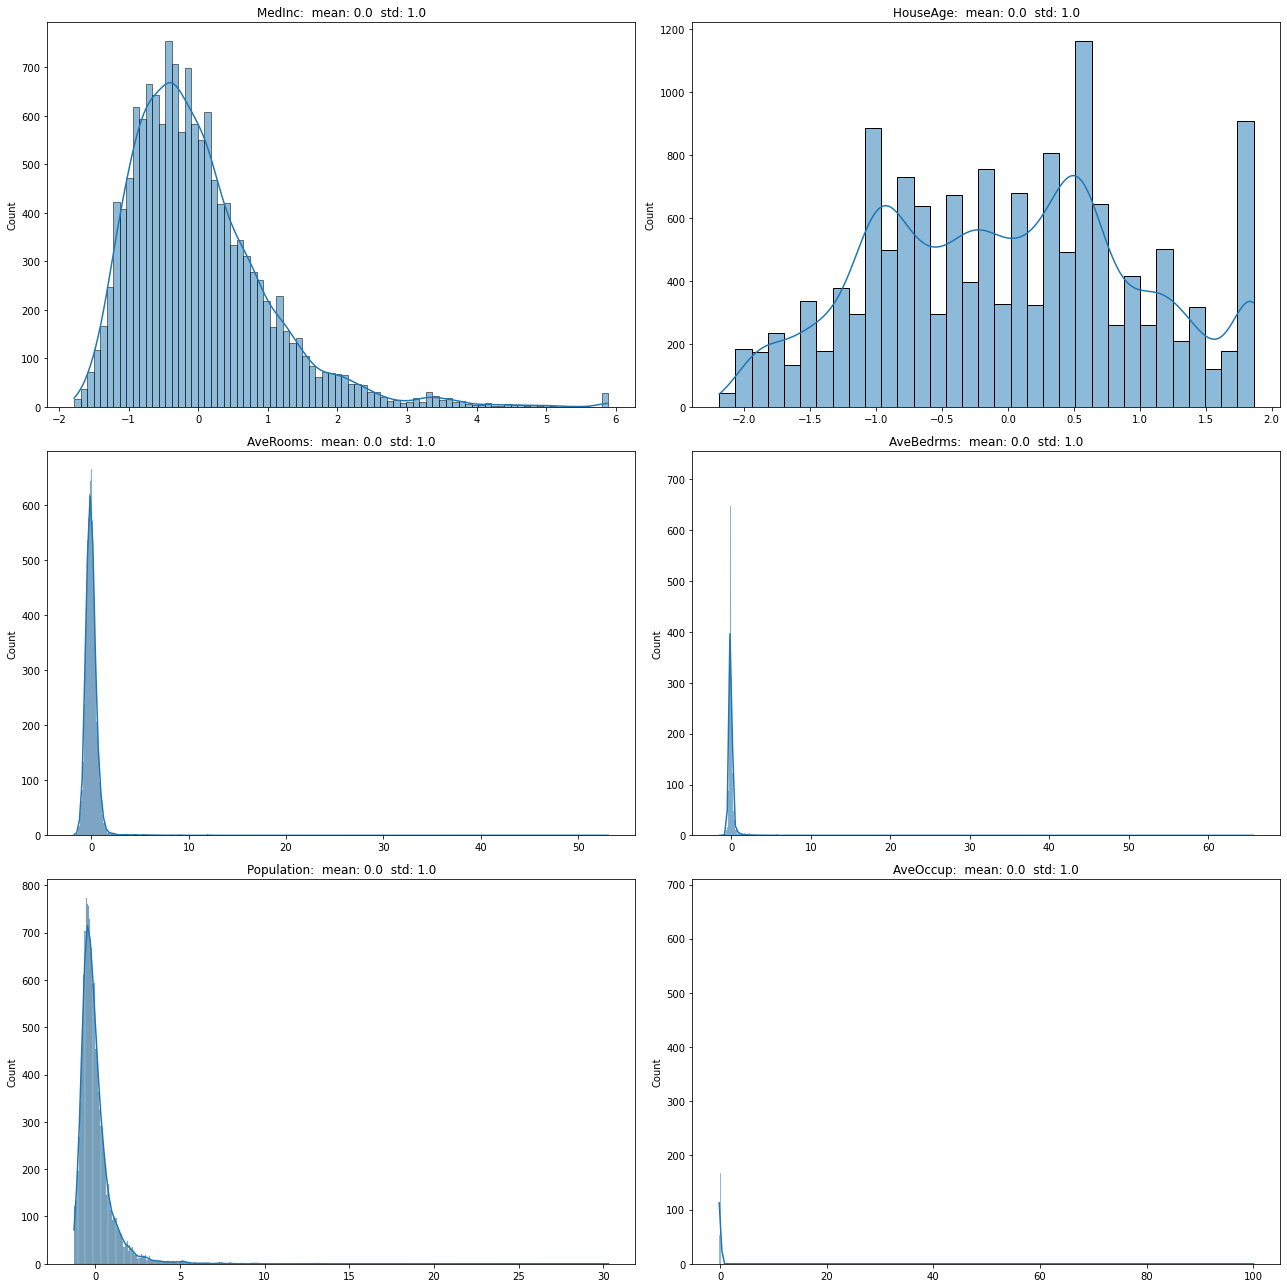

In [15]:
f, axs = plt.subplots(3, 2, figsize=(18,18))

for i, feat in enumerate(X_train_std.T):
    sns.histplot(feat, kde=True, ax=axs.flat[i])
    axs.flat[i].set_title('{}:  mean: {}  std: {}'.format(list(california_housing.feature_names)[i], abs(feat.mean().round(2)), feat.std().round(2)))
plt.tight_layout();

<a id="predictive_models"></a>

# Predictive Models

# [DummyRegressor](https://scikit-learn.org/stable/modules/model_evaluation.html#dummy-estimators)

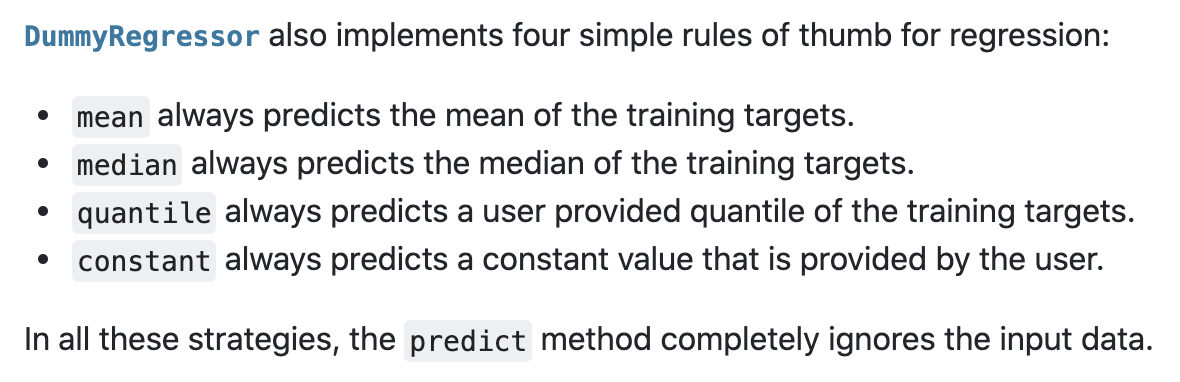

In [30]:
Image(filename='../images/dummy_regressor.png', width=600)

In [22]:
from sklearn.dummy import DummyRegressor

d_clf = DummyRegressor(strategy='mean')
d_clf.fit(X_train_std, y_train)

print('R^2 (train): {:.2f}'.format(abs(d_clf.score(X_train_std, y_train)))) # coefficient of determination R^2
print('R^2  (test): {:.2f}'.format(abs(d_clf.score(X_test_std,  y_test))))

R^2 (train): 0.00
R^2  (test): 0.00


<a id="linear_regression"></a>

# [Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html)

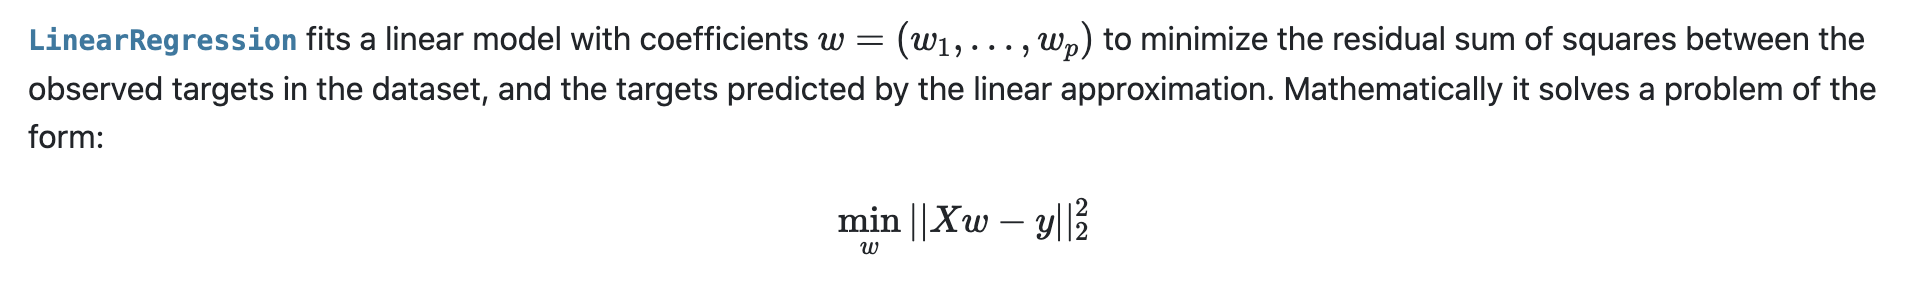

In [41]:
Image(filename='../images/ols_linear_regression_description.png', width=900)

In [23]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

start = time()
lr.fit(X_train_std, y_train)
lr_duration = time() - start

print("LinearRegression took {:.3f} seconds.".format(lr_duration))

print('R^2 (train): {:.2f}'.format(lr.score(X_train_std, y_train)))
print('R^2  (test): {:.2f}'.format(lr.score(X_test_std,  y_test)))

LinearRegression took 0.017 seconds.
R^2 (train): 0.54
R^2  (test): 0.53


# [Model parameters](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [24]:
lr_params = dict(zip(list(california_housing.feature_names), list(lr.coef_)), 
                 intercept=lr.intercept_)
{param: value.round(2) for (param, value) in sorted(lr_params.items(), key=lambda item: item[1], reverse=True)}

{'intercept': 2.08,
 'MedInc': 1.02,
 'AveBedrms': 0.48,
 'HouseAge': 0.21,
 'Population': 0.02,
 'AveOccup': -0.05,
 'AveRooms': -0.53}

# [Predicted values](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [25]:
predictions = lr.predict(X_test_std)
predictions

array([2.08490693, 1.22510966, 2.56131005, ..., 1.78234788, 1.24879514,
       1.54028852])

# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) on test set

In [26]:
from sklearn.model_selection import cross_val_score

def get_cross_val(clf, X, y, model_name, cv_num=5, metric='r2'):
    scores = cross_val_score(clf, X, y, cv=cv_num, scoring=metric)
    mean = scores.mean()
    std  = scores.std()
    p025 = np.quantile(scores, 0.025)
    p975 = np.quantile(scores, 0.975)
    metrics = ['mean', 'standard deviation', 'p025', 'p975']
    s = pd.Series([mean, std, p025, p975], index=metrics)  # np.where(lb < 0, 0, lb), np.where(ub > 1, 1, ub)
    s.name = model_name
    return s

In [27]:
lr_cv = get_cross_val(lr, X_test_std, y_test, 'linear regression')
lr_cv.round(2)

mean                  0.55
standard deviation    0.02
p025                  0.52
p975                  0.57
Name: linear regression, dtype: float64

# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

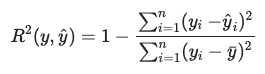

In [48]:
Image(filename='../images/def_r2.png', width=250)

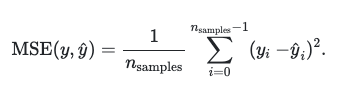

In [50]:
Image(filename='../images/def_mse.png', width=300)

In [28]:
def calculate_metrics(y_true, y_pred, duration, model_name, *args):
    r2   = r2_score(y_true, y_pred)
    ev   = explained_variance_score(y_true, y_pred)
    mse  = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae  = mean_absolute_error(y_true, y_pred)
    metrics = ['R^2', 'explained_variance', 'mse', 'rmse', 'mae', 'time_to_fit (seconds)']
    s = pd.Series([r2, ev, mse, rmse, mae, duration], index=metrics)
    s.name = model_name
    return s

In [29]:
y_pred = lr.predict(X_test_std)

lr_metrics = calculate_metrics(y_test, y_pred, lr_duration, 'linear_regression')
lr_metrics.round(2)

R^2                      0.53
explained_variance       0.53
mse                      0.62
rmse                     0.79
mae                      0.58
time_to_fit (seconds)    0.02
Name: linear_regression, dtype: float64

<a id="k_nearest_neighbors"></a>

# [K-Nearest Neighbors](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-regression)

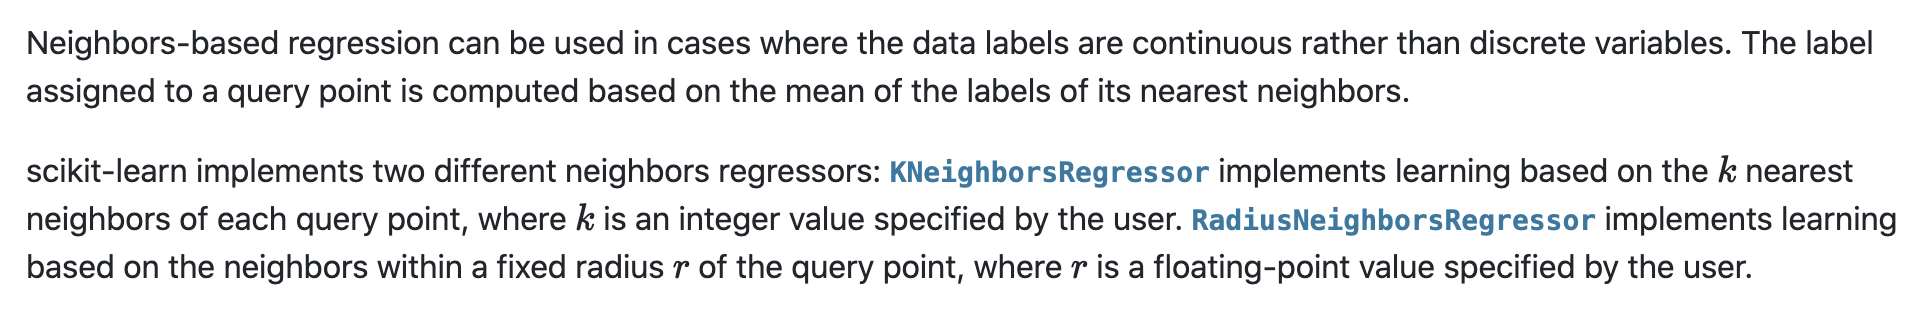

In [42]:
Image(filename='../images/knn_regressor_description.png', width=900)

In [30]:
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'weights': ['uniform', 'distance'],
              'n_neighbors': np.arange(1,16)}

knn = KNeighborsRegressor()

gs_knn = GridSearchCV(knn, param_grid=param_grid)

start = time()
gs_knn.fit(X_train_std, y_train)
knn_duration = time() - start

print("GridSearchCV of KNN took {:.2f} seconds for {} candidate parameter settings.".format(knn_duration, 
                                                                                            len(gs_knn.cv_results_['params'])))
# report(gs_knn.cv_results_)
print('Optimal weights: {}  Optimal n_neighbors: {}'.format(gs_knn.best_params_['weights'], gs_knn.best_params_['n_neighbors']))
print('R^2 (train): {:.2f}'.format(gs_knn.score(X_train_std, y_train)))
print('R^2  (test): {:.2f}'.format(gs_knn.score(X_test_std,  y_test)))

GridSearchCV of KNN took 17.62 seconds for 30 candidate parameter settings.
Optimal weights: distance  Optimal n_neighbors: 15
R^2 (train): 1.00
R^2  (test): 0.61


# [Best parameters](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)

In [45]:
pprint(gs_knn.best_estimator_.get_params())

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 15,
 'p': 2,
 'weights': 'distance'}


# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) on test set

In [31]:
knn_cv = get_cross_val(gs_knn, X_test_std, y_test, 'k-nearest neighbors')
knn_cv.round(2)

mean                  0.59
standard deviation    0.01
p025                  0.58
p975                  0.62
Name: k-nearest neighbors, dtype: float64

# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [37]:
y_pred = gs_knn.predict(X_test_std)

knn_metrics = calculate_metrics(y_test, y_pred, knn_duration, 'k-nearest neighbors')
knn_metrics.round(2)

R^2                       0.61
explained_variance        0.61
mse                       0.52
rmse                      0.72
mae                       0.52
time_to_fit (seconds)    14.17
Name: k-nearest neighbors, dtype: float64

<a id="elasticnet"></a>

# [ElasticNet](https://scikit-learn.org/stable/modules/linear_model.html#elastic-net)

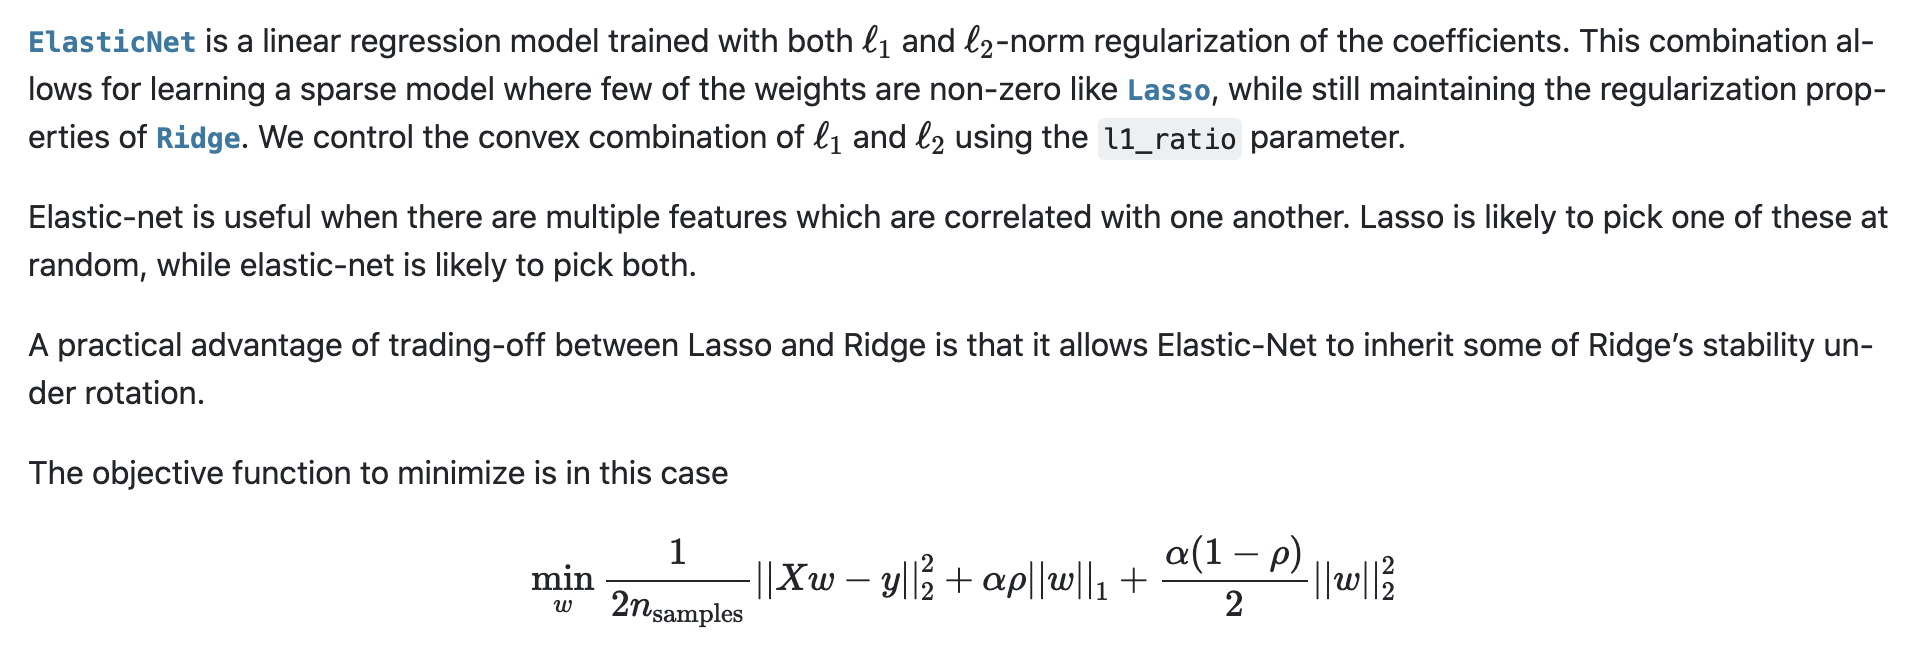

In [43]:
Image(filename='../images/elastic_net_description.png', width=900)

In [32]:
from sklearn.linear_model import ElasticNetCV

# l1_ratio = 0 the penalty is an L2 penalty (Ridge)
# l1_ratio = 1 the penalty is an L1 penalty (Lasso)
# For 0 < l1_ratio < 1, the penalty is a combination of L1 and L2

enet = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], 
                    cv=5, random_state=0)

start = time()
enet.fit(X_train_std, y_train)
enet_duration = time() - start

print("ElasticNetCV took {:.2f} seconds for {} candidate parameter settings.".format(enet_duration, len(enet.alphas_)))
print('Optimal alpha: {:.4f}  Optimal l1_ratio: {:.2f}'.format(enet.alpha_, enet.l1_ratio_))
print('Intercept: {:.2f}  Coefficients: {}'.format(enet.intercept_, [round(el, 2) for el in list(enet.coef_)]))

print('R^2 (train): {:.2f}'.format(enet.score(X_train_std, y_train)))
print('R^2  (test): {:.2f}'.format(enet.score(X_test_std,  y_test)))

ElasticNetCV took 1.12 seconds for 7 candidate parameter settings.
Optimal alpha: 0.0086  Optimal l1_ratio: 0.10
Intercept: 2.08  Coefficients: [0.98, 0.21, -0.45, 0.41, 0.02, -0.05]
R^2 (train): 0.54
R^2  (test): 0.53


# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) on test set

In [45]:
enet_cv = get_cross_val(enet, X_test_std, y_test, 'elasticnet')
enet_cv.round(2)

mean                  0.54
standard deviation    0.01
p025                  0.53
p975                  0.56
Name: elasticnet, dtype: float64

# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [38]:
y_pred = enet.predict(X_test_std)

enet_metrics = calculate_metrics(y_test, y_pred, enet_duration, 'elasticnet')
enet_metrics.round(2)

R^2                      0.53
explained_variance       0.53
mse                      0.62
rmse                     0.79
mae                      0.58
time_to_fit (seconds)    0.77
Name: elasticnet, dtype: float64

<a id="support_vector_machines"></a>

# [Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html#regression)

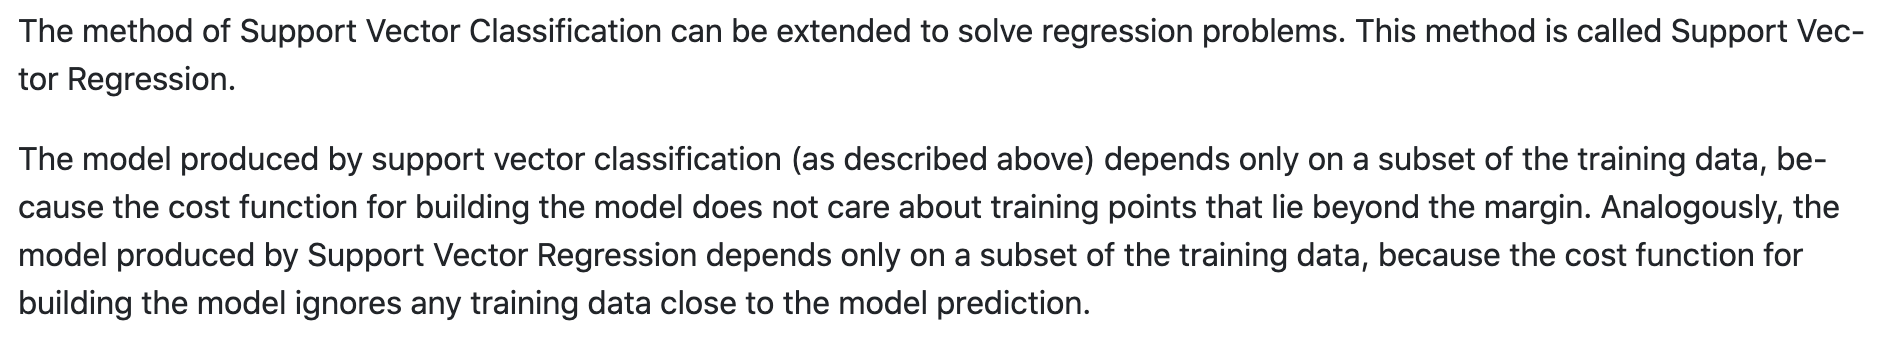

In [44]:
Image(filename='../images/svr_description.png', width=900)

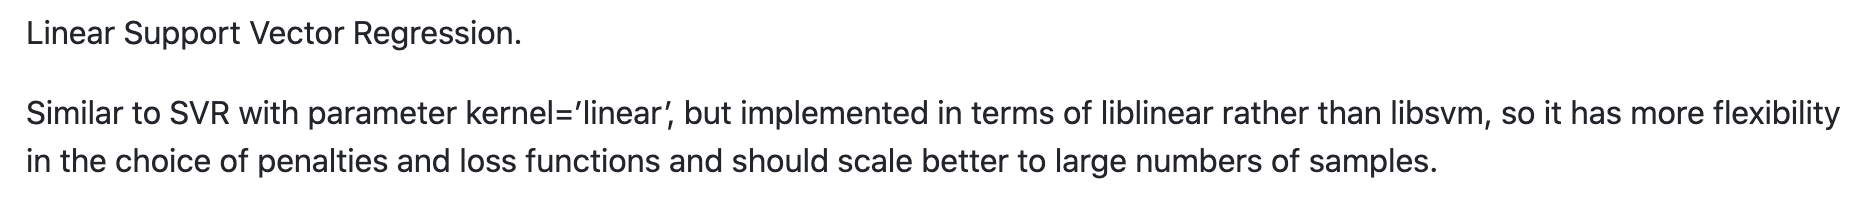

In [45]:
Image(filename='../images/svr_linear_description.png', width=900)

In [33]:
from sklearn.svm import LinearSVR

param_grid = {'C': np.power(10, np.arange(0, 3, dtype=float))}

svr = LinearSVR(random_state=1234)

gs_svr = GridSearchCV(svr, param_grid=param_grid, 
                      cv=3, n_jobs=3)

start = time()
gs_svr.fit(X_train_std, y_train)
svr_duration = time() - start

print("GridSearchCV of LinearSVR took {:.2f} seconds for {} candidate parameter settings.".format(svr_duration, 
                                                                                                  len(gs_svr.cv_results_['params'])))
# report(gs_svr.cv_results_)
print('Optimal C: {}'.format(gs_svr.best_params_['C']))
print('R^2 (train): {:.2f}'.format(gs_svr.score(X_train_std, y_train)))
print('R^2  (test): {:.2f}'.format(gs_svr.score(X_test_std,  y_test)))

GridSearchCV of LinearSVR took 6.38 seconds for 3 candidate parameter settings.
Optimal C: 1.0
R^2 (train): 0.52
R^2  (test): 0.51


# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) on test set

In [15]:
svr_cv = get_cross_val(gs_svr, X_test_std, y_test, 'support vector machines')
svr_cv.round(2)

mean                  0.54
standard deviation    0.01
p025                  0.52
p975                  0.56
Name: support vector machines, dtype: float64

# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [39]:
y_pred = gs_svr.predict(X_test_std)

svr_metrics = calculate_metrics(y_test, y_pred, svr_duration, 'support vector machines')
svr_metrics.round(2)

R^2                      0.51
explained_variance       0.52
mse                      0.64
rmse                     0.80
mae                      0.56
time_to_fit (seconds)    2.39
Name: support vector machines, dtype: float64

<a id="random_forest"></a>

# [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

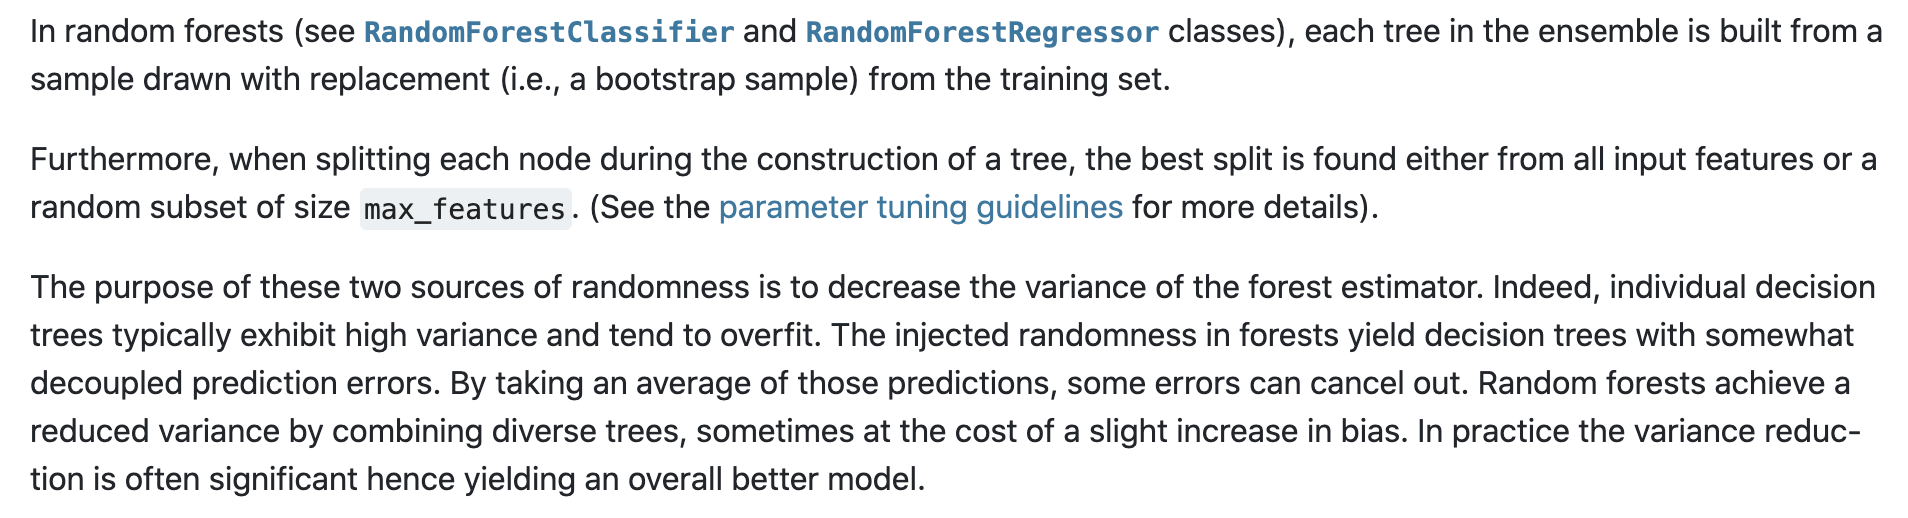

In [46]:
Image(filename='../images/random_forest_description.png', width=900)

In [25]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': np.arange(100, 1000, 200, dtype=int),
              'max_features': [None, 'sqrt', 'log2'],
              'max_depth': [None, 3, 5, 7]}

rfr = RandomForestRegressor(oob_score=True, 
                            n_jobs=3, random_state=0)

gs_rf = GridSearchCV(rfr, param_grid=param_grid)

start = time()
gs_rf.fit(X_train_std, y_train)
rf_duration = time() - start

print("GridSearchCV of RF took {:.2f} seconds for {} candidate parameter settings.".format(rf_duration, 
                                                                                           len(gs_rf.cv_results_['params'])))
# report(gs_rf.cv_results_)
print('Optimal n_estimators: {}  Optimal max_features: {}  Optimal max_depth: {}'.format(gs_rf.best_params_['n_estimators'], 
                                                                                                                gs_rf.best_params_['max_features'], 
                                                                                                                gs_rf.best_params_['max_depth']))
print('R^2 (train): {:.2f}'.format(gs_rf.score(X_train_std, y_train)))
print('R^2  (test): {:.2f}'.format(gs_rf.score(X_test_std,  y_test)))

GridSearchCV of RF took 1100.63 seconds for 60 candidate parameter settings.
Optimal n_estimators: 900  Optimal max_features: sqrt  Optimal max_depth: None
R^2 (train): 0.96
R^2  (test): 0.69


# [Cross-validation score](https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics) on test set

In [26]:
rfr = RandomForestRegressor(n_estimators=gs_rf.best_params_['n_estimators'], 
                            max_features=gs_rf.best_params_['max_features'], 
                            max_depth=gs_rf.best_params_['max_depth'], 
                            oob_score=True, 
                            random_state=0)

rf_cv = get_cross_val(rfr, X_test_std, y_test, 'random forest')
rf_cv.round(2)

mean                  0.68
standard deviation    0.02
p025                  0.66
p975                  0.71
Name: random forest, dtype: float64

# [A collection of metrics for comparing models](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [27]:
rf_metrics = calculate_metrics(y_test, y_pred, rf_duration, 'random forest')
rf_metrics

R^2                         0.514027
explained_variance          0.522053
mse                         0.638900
rmse                        0.799312
mae                         0.557585
time_to_fit (seconds)    1100.627937
Name: random forest, dtype: float64

# [Variable importances](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html) in the random forest model

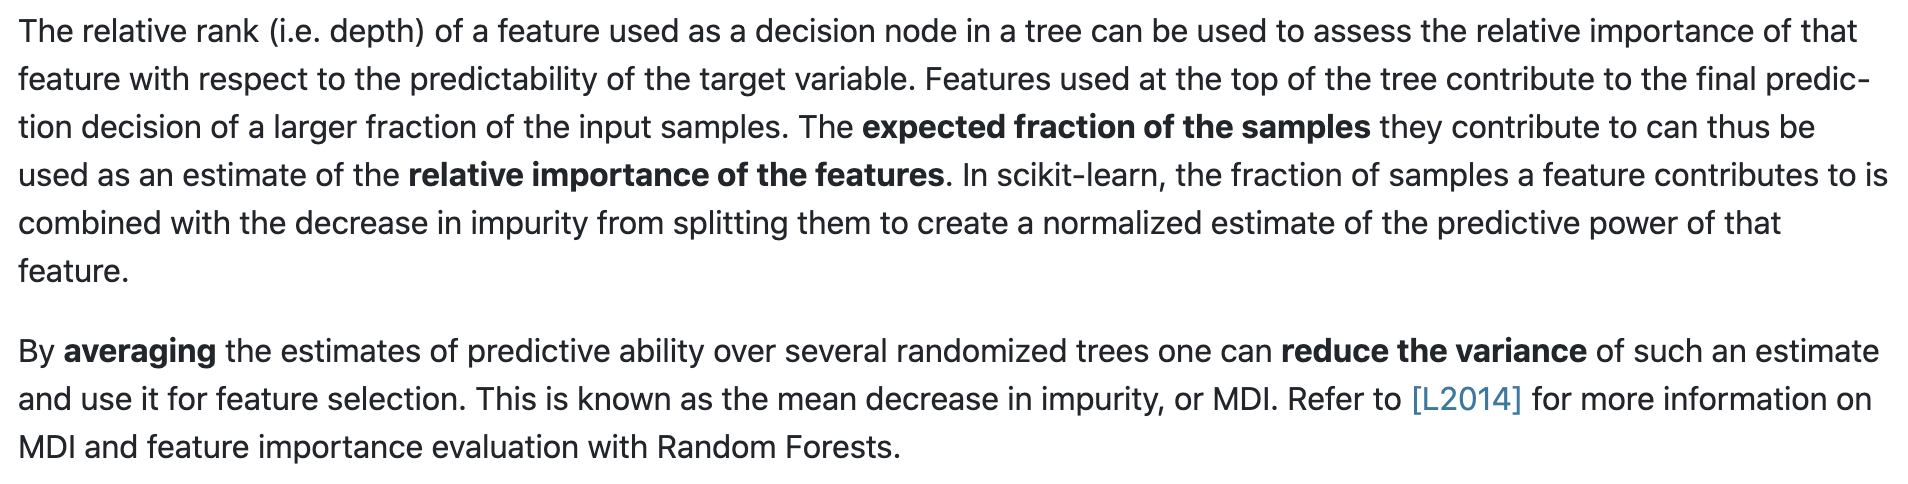

In [47]:
Image(filename='../images/random_forest_feature_importance.png', width=900)

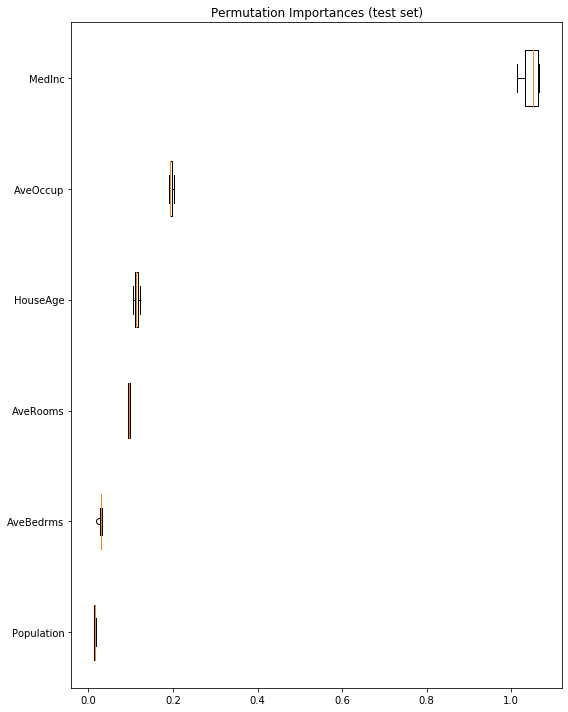

In [30]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gs_rf, X_test_std, y_test, n_repeats=10,
                                random_state=42, n_jobs=-1)
sorted_idx = result.importances_mean.argsort()

X_test_df = pd.DataFrame(X_test_std, columns=list(california_housing.feature_names)[:6])

f, ax = plt.subplots(figsize=(8,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test_df.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
plt.tight_layout();

<a id="compare_models"></a>

# Compare Models

# Regression metrics scores and time-to-fit models (in seconds)

In [40]:
model_metrics = pd.concat([lr_metrics, knn_metrics, enet_metrics, svr_metrics, rf_metrics], axis=1).T

model_metrics.apply(lambda elem: [np.round(val, 2) for val in elem]).sort_values(by='rmse', ascending=False)

,R^2,explained_variance,mse,rmse,mae,time_to_fit (seconds)
support vector machines,0.51,0.52,0.64,0.80,0.56,2.39
random forest,0.51,0.52,0.64,0.80,0.56,1100.63
linear_regression,0.53,0.53,0.62,0.79,0.58,0.06
elasticnet,0.53,0.53,0.62,0.79,0.58,0.77
k-nearest neighbors,0.61,0.61,0.52,0.72,0.52,14.17


# Cross-validation scores on test set

In [46]:
cross_vals = pd.concat([lr_cv, knn_cv, enet_cv, svr_cv, rf_cv], axis=1).T

cross_vals = cross_vals.round(2).sort_values(by='mean', ascending=False)
cross_vals

,mean,standard deviation,p025,p975
random forest,0.68,0.02,0.66,0.71
k-nearest neighbors,0.59,0.01,0.58,0.62
linear regression,0.55,0.02,0.52,0.57
elasticnet,0.54,0.01,0.53,0.56
support vector machines,0.54,0.01,0.52,0.56


# Plot of mean (+/- std) cross-validation scores

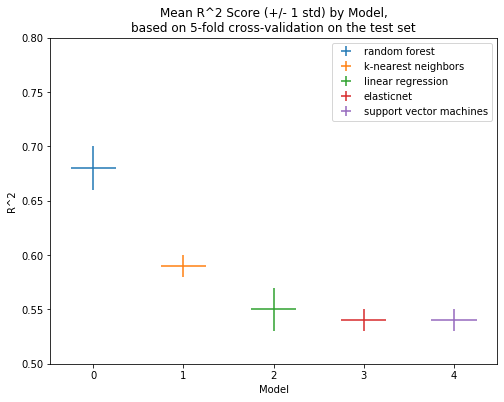

In [50]:
fig = plt.figure(figsize=(8,6))

for i in range(len(cross_vals.index)):
    plt.errorbar(x=i, y=cross_vals.iloc[i, 0], # mean column
                 xerr=0.25,
                 yerr=cross_vals.iloc[i, 1], # standard deviation column   alternatively: [mean - p025, p975 - mean],
                 linestyle='',
                 label=list(cross_vals.index)[i])

plt.ylim(0.5,0.8)
plt.title('Mean R^2 Score (+/- 1 std) by Model,\nbased on 5-fold cross-validation on the test set')
plt.xlabel('Model')
plt.ylabel('R^2')
plt.legend(loc='upper right');

[Back to top](#top)